In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# configuration 
num_samples_total = 1000
cluster_centers = [(3, 3), (7, 7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 13

# data
X, y = make_blobs(n_samples=num_samples_total, centers=cluster_centers, 
                  n_features=num_classes, center_box=(0, 1), cluster_std=0.5)

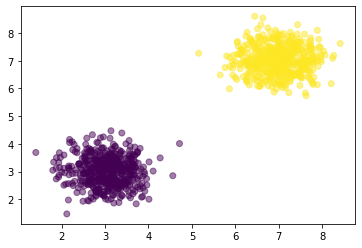

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, cmap='viridis')

In [13]:
# dbscan
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_

In [20]:
no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)

In [22]:
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 0


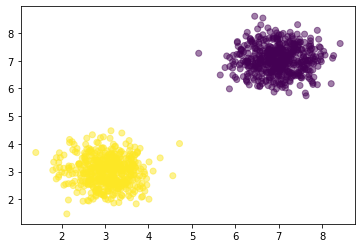

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.5)

We set values for ϵ and minPts.
We randomly select a point from the samples that has not been checked before.
We retrieve the ϵ−neighborhood for this point. If it equals or exceeds minPts, we signal it as a cluster. Otherwise, we label it as noise.
We signal the ϵ−neighborhood as being part of the cluster. This means that for each point of that neighborhood, its own ϵ−neighborhood is added to the cluster as well, and so on, and so on. We continue until no further point can be added to the cluster. Note that the point originally labeled as noise can now also become part of this cluster (it may be part of the ϵ−neighborhood of one of the other points), or of another cluster later, because:
We now start at (2) again, unless all points have been checked and labeled.

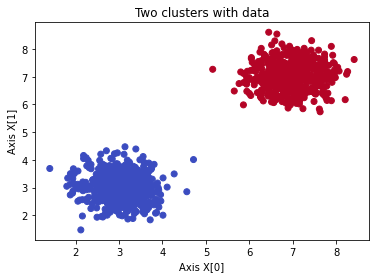

In [24]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

### removing outliers

In [28]:
db = DBSCAN(eps=0.3, min_samples=min_samples, n_jobs=-1).fit(X)
labels = db.labels_

no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 28


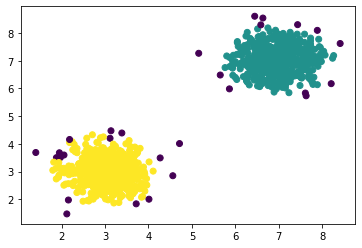

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=labels)

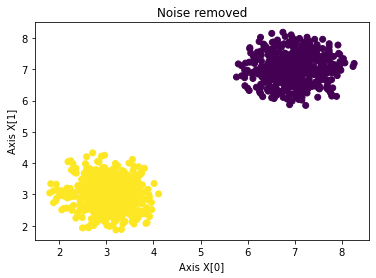

In [33]:
# removing noise
range_max = len(X)
X = np.array([X[i] for i in range(0, range_max) if labels[i] != -1])
labels = np.array([labels[i] for i in range(0, range_max) if labels[i] != -1])

# Generate scatter plot for training data
colors = list(map(lambda x: '#000000' if x == -1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=labels, marker="o", picker=True)
plt.title(f'Noise removed')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()


https://towardsdatascience.com/dbscan-with-python-743162371dca okumalısın